In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Load the uploaded CSV file
file_path = '/workspaces/codespaces-jupyter/ml_final/smoking.csv'
data = pd.read_csv(file_path)
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [ ]:
missing_values_summary = data.isnull().sum()
missing_values_summary

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [ ]:
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 0


In [ ]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

print("Categorical columns in the dataset:")
print(categorical_columns)

Categorical columns in the dataset:
Index(['gender', 'oral', 'tartar'], dtype='object')


In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to all categorical columns
for col in data.select_dtypes(include=['object', 'category']).columns:
    data[col] = label_encoder.fit_transform(data[col])

print("Label encoding applied. Here is a preview of the dataset:")
print(data.head())


Label encoding applied. Here is a preview of the dataset:
   ID  gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0       0   40         155          60       81.3             1.2   
1   1       0   40         160          60       81.0             0.8   
2   2       1   55         170          60       80.0             0.8   
3   3       1   40         165          70       88.0             1.5   
4   4       0   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              1.0            1.0             1.0  ...        12.9   
1              0.6            1.0             1.0  ...        12.7   
2              0.8            1.0             1.0  ...        15.8   
3              1.5            1.0             1.0  ...        14.7   
4              1.0            1.0             1.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0    

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to all numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print("Normalization applied. Here is a preview of the normalized dataset:")
print(data.head())


Normalization applied. Here is a preview of the normalized dataset:
         ID  gender       age  height(cm)  weight(kg)  waist(cm)  \
0  0.000000     0.0  0.307692    0.416667    0.285714   0.388462   
1  0.000018     0.0  0.307692    0.500000    0.285714   0.384615   
2  0.000036     1.0  0.538462    0.666667    0.285714   0.371795   
3  0.000054     1.0  0.307692    0.583333    0.380952   0.474359   
4  0.000072     0.0  0.307692    0.416667    0.285714   0.448718   

   eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  ...  \
0        0.112245         0.091837            0.0             0.0  ...   
1        0.071429         0.051020            0.0             0.0  ...   
2        0.071429         0.071429            0.0             0.0  ...   
3        0.142857         0.142857            0.0             0.0  ...   
4        0.091837         0.091837            0.0             0.0  ...   

   hemoglobin  Urine protein  serum creatinine       AST       ALT       Gtp  

In [ ]:

target_column = 'smoking'

if target_column in data.columns:
    # Get the class distribution
    class_distribution = data[target_column].value_counts(normalize=True)
    print(f"Class distribution for {target_column}:\n", class_distribution)
else:
    print(f"'{target_column}' column not found in the dataset.")


Class distribution for smoking:
 smoking
0.0    0.632712
1.0    0.367288
Name: proportion, dtype: float64


/tmp/ipykernel_4953/2733677799.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


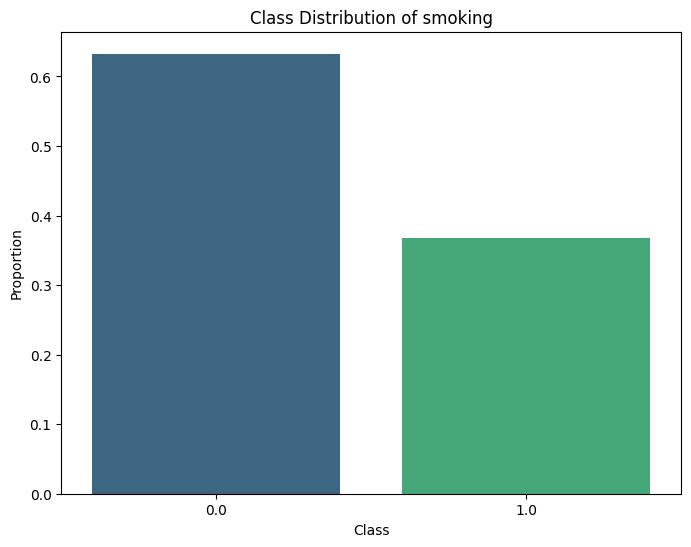

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title(f"Class Distribution of {target_column}")
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
# Split features and target
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled data back into a single DataFrame
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled[target_column] = y_resampled

print("Dataset balanced using SMOTE. New class distribution:")
print(data_resampled[target_column].value_counts(normalize=True))


Dataset balanced using SMOTE. New class distribution:
smoking
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


/tmp/ipykernel_4953/3825525949.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution_balanced.index, y=class_distribution_balanced.values, palette="viridis")


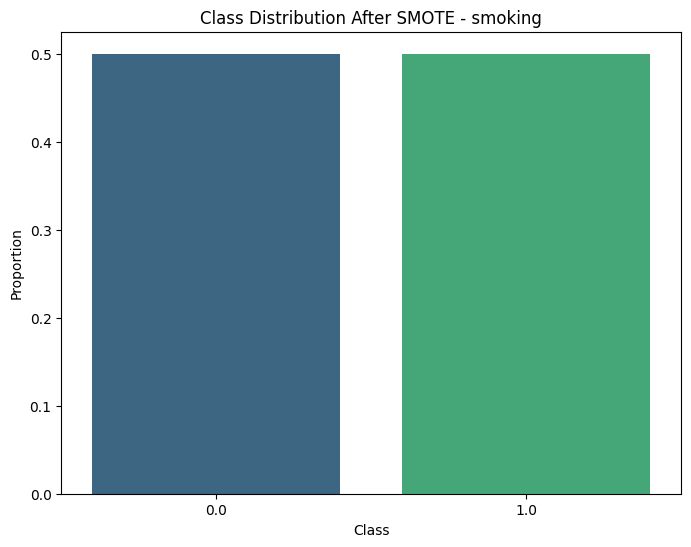

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have 'data_resampled' which contains the balanced dataset after SMOTE

# Get the class distribution after SMOTE
class_distribution_balanced = data_resampled[target_column].value_counts(normalize=True)

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution_balanced.index, y=class_distribution_balanced.values, palette="viridis")
plt.title(f"Class Distribution After SMOTE - {target_column}")
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.show()


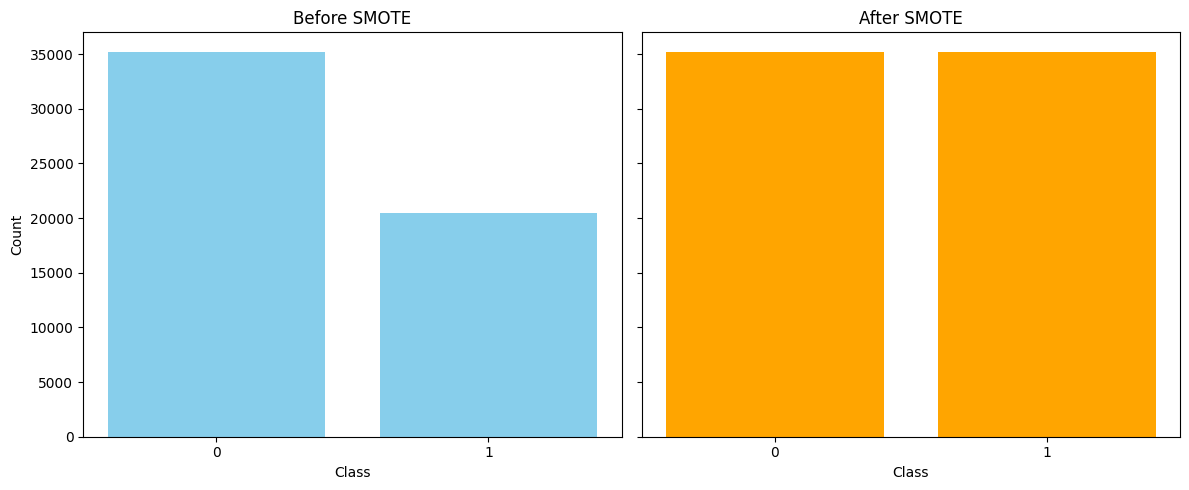

In [ ]:
# Class distribution before and after SMOTE
class_distribution_before = data['smoking'].value_counts()
class_distribution_after = y_resampled.value_counts()

# Plot class distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Before SMOTE
axes[0].bar(class_distribution_before.index, class_distribution_before.values, color='skyblue')
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].set_xticks(class_distribution_before.index)

# After SMOTE
axes[1].bar(class_distribution_after.index, class_distribution_after.values, color='orange')
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("Class")
axes[1].set_xticks(class_distribution_after.index)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Split the features and target variable
X_resampled = data_resampled.drop(columns=[target_column])  # Features
y_resampled = data_resampled[target_column]  # Target


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Train and Test split completed.")


Train and Test split completed.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Print the shape of the split data
print("Train and Test split completed.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Train and Test split completed.
X_train shape: (56379, 26)
X_test shape: (14095, 26)
y_train shape: (56379,)
y_test shape: (14095,)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.88      0.61      0.72      6990
         1.0       0.70      0.92      0.80      7105

    accuracy                           0.76     14095
   macro avg       0.79      0.76      0.76     14095
weighted avg       0.79      0.76      0.76     14095



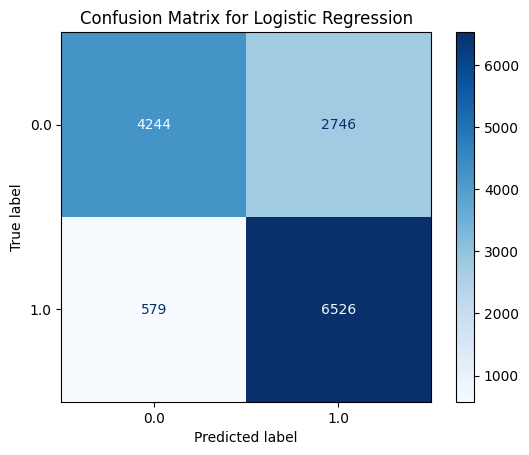

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86      6990
         1.0       0.84      0.92      0.87      7105

    accuracy                           0.87     14095
   macro avg       0.87      0.87      0.87     14095
weighted avg       0.87      0.87      0.87     14095



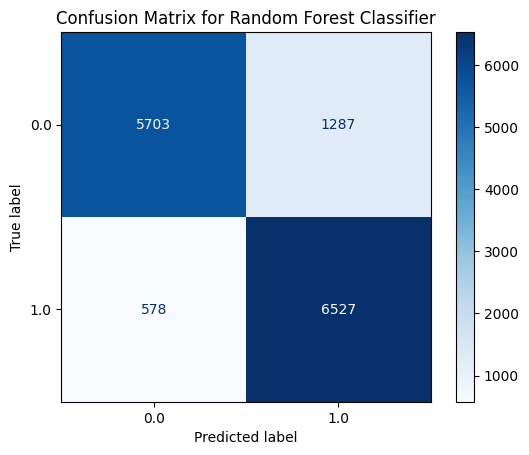

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.92      0.56      0.70      6990
         1.0       0.69      0.95      0.80      7105

    accuracy                           0.76     14095
   macro avg       0.81      0.76      0.75     14095
weighted avg       0.81      0.76      0.75     14095



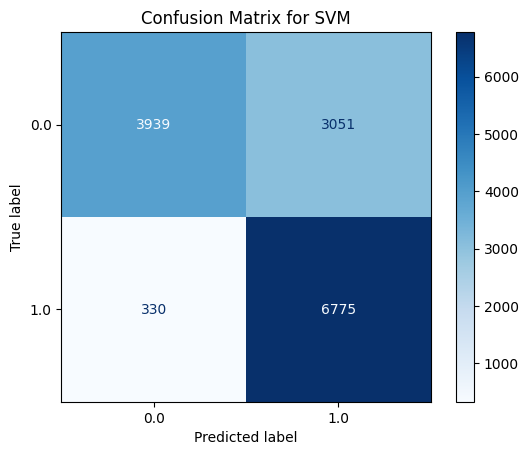

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the Support Vector Machine (SVM)
svm = SVC(random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for SVM")
plt.show()


Classification Report for KNN:
              precision    recall  f1-score   support

         0.0       0.85      0.68      0.75      6990
         1.0       0.74      0.88      0.80      7105

    accuracy                           0.78     14095
   macro avg       0.79      0.78      0.78     14095
weighted avg       0.79      0.78      0.78     14095



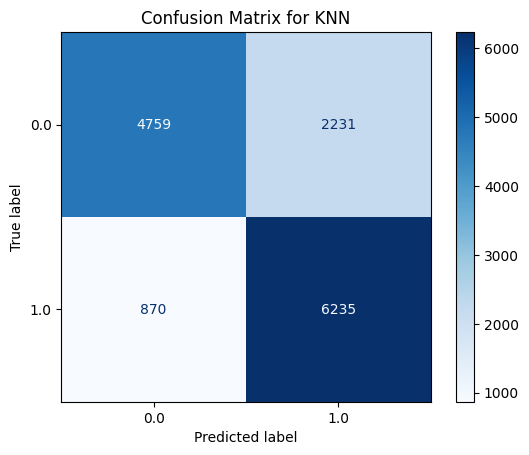

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the K-Nearest Neighbors model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Display the confusion matrix with blue and white colors
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap="Blues")  # Set the colormap to blue and white
plt.title("Confusion Matrix for KNN")
plt.show()


Accuracy of Decision Tree: 0.80

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80      6990
         1.0       0.81      0.80      0.80      7105

    accuracy                           0.80     14095
   macro avg       0.80      0.80      0.80     14095
weighted avg       0.80      0.80      0.80     14095



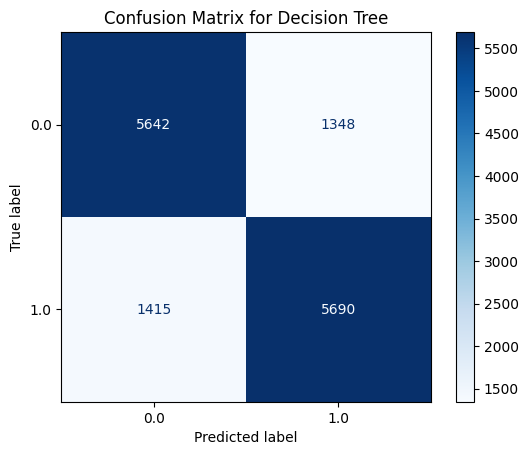

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree: {accuracy:.2f}")

# Evaluate the model with classification report
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Display the confusion matrix with blue and white colors
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap="Blues")  # Set the colormap to blue and white
plt.title("Confusion Matrix for Decision Tree")
plt.show()


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:29:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy of XGBoost Classifier: 0.83

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82      6990
         1.0       0.81      0.85      0.83      7105

    accuracy                           0.83     14095
   macro avg       0.83      0.83      0.83     14095
weighted avg       0.83      0.83      0.83     14095



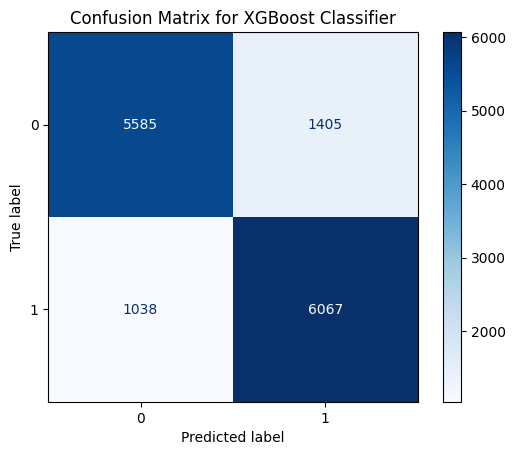

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost Classifier: {accuracy:.2f}")

# Evaluate the model with classification report
print("\nClassification Report for XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Display the confusion matrix with blue and white colors
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap="Blues")  # Set the colormap to blue and white
plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()


Accuracy of AdaBoost Classifier: 0.78

Classification Report for AdaBoost Classifier:
              precision    recall  f1-score   support

         0.0       0.83      0.70      0.76      6990
         1.0       0.74      0.86      0.80      7105

    accuracy                           0.78     14095
   macro avg       0.79      0.78      0.78     14095
weighted avg       0.79      0.78      0.78     14095



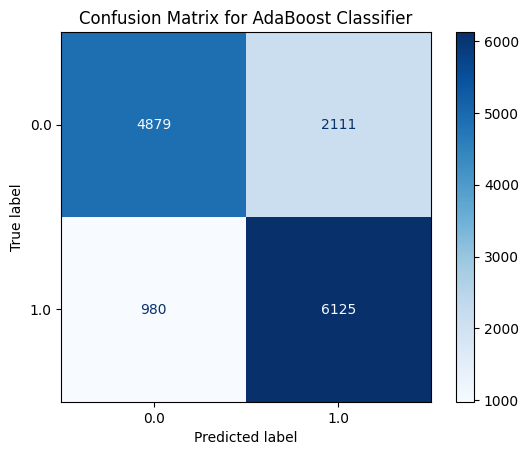

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the AdaBoost Classifier
adb = AdaBoostClassifier(random_state=42)

# Train the model
adb.fit(X_train, y_train)

# Predict on the test set
y_pred_adb = adb.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_adb)
print(f"Accuracy of AdaBoost Classifier: {accuracy:.2f}")

# Evaluate the model with classification report
print("\nClassification Report for AdaBoost Classifier:")
print(classification_report(y_test, y_pred_adb))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_adb)

# Display the confusion matrix with blue and white colors
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adb.classes_)
disp.plot(cmap="Blues")  # Set the colormap to blue and white
plt.title("Confusion Matrix for AdaBoost Classifier")
plt.show()


Accuracy of Gradient Boosting: 0.80

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.85      0.72      0.78      6990
         1.0       0.76      0.88      0.81      7105

    accuracy                           0.80     14095
   macro avg       0.81      0.80      0.80     14095
weighted avg       0.81      0.80      0.80     14095



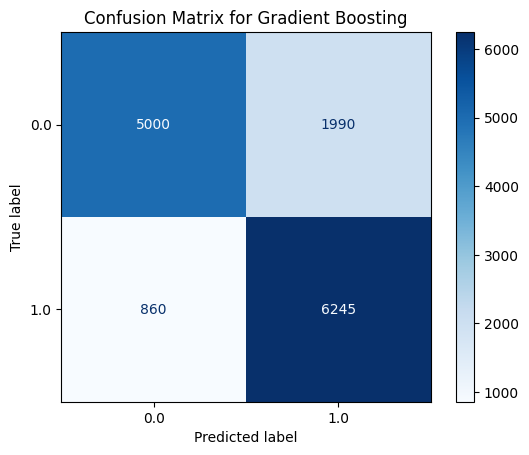

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Train the model
gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy of Gradient Boosting: {accuracy_gb:.2f}")
print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Initialize RFE with the model and number of features to select
rfe = RFE(estimator=model, n_features_to_select=24)
X_rfe = rfe.fit_transform(X, y)

# Get the ranking of features
ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

# Print the top 25 features
top_25_features = ranking[ranking['Ranking'] == 1]
print(top_25_features)


                Feature  Ranking
0                    ID        1
22                  Gtp        1
21                  ALT        1
20                  AST        1
19     serum creatinine        1
18        Urine protein        1
17           hemoglobin        1
16                  LDL        1
15                  HDL        1
14         triglyceride        1
13          Cholesterol        1
24        dental caries        1
12  fasting blood sugar        1
10             systolic        1
9        hearing(right)        1
7       eyesight(right)        1
6        eyesight(left)        1
5             waist(cm)        1
4            weight(kg)        1
3            height(cm)        1
2                   age        1
1                gender        1
11           relaxation        1
25               tartar        1


Training and Evaluating Logistic Regression
Accuracy: 0.7641
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.61      0.72      6990
         1.0       0.70      0.92      0.80      7105

    accuracy                           0.76     14095
   macro avg       0.79      0.76      0.76     14095
weighted avg       0.79      0.76      0.76     14095



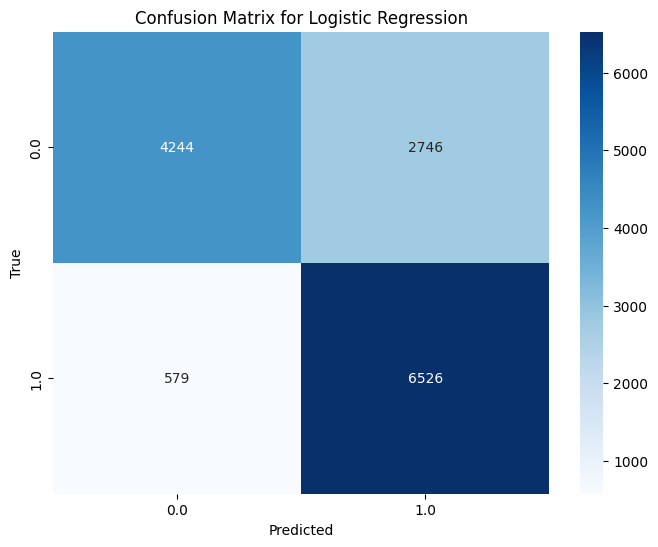

--------------------------------------------------
Training and Evaluating Random Forest
Accuracy: 0.8677
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86      6990
         1.0       0.84      0.92      0.87      7105

    accuracy                           0.87     14095
   macro avg       0.87      0.87      0.87     14095
weighted avg       0.87      0.87      0.87     14095



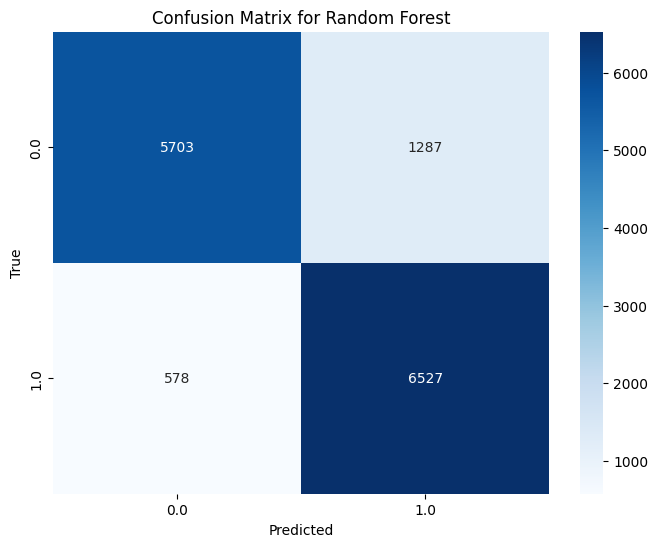

--------------------------------------------------
Training and Evaluating SVM
Accuracy: 0.7601
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.56      0.70      6990
         1.0       0.69      0.95      0.80      7105

    accuracy                           0.76     14095
   macro avg       0.81      0.76      0.75     14095
weighted avg       0.81      0.76      0.75     14095



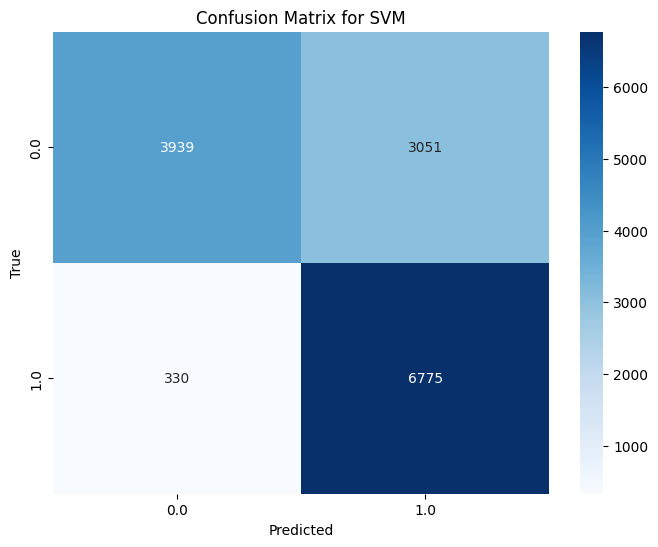

--------------------------------------------------
Training and Evaluating KNN
Accuracy: 0.7800
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.68      0.75      6990
         1.0       0.74      0.88      0.80      7105

    accuracy                           0.78     14095
   macro avg       0.79      0.78      0.78     14095
weighted avg       0.79      0.78      0.78     14095



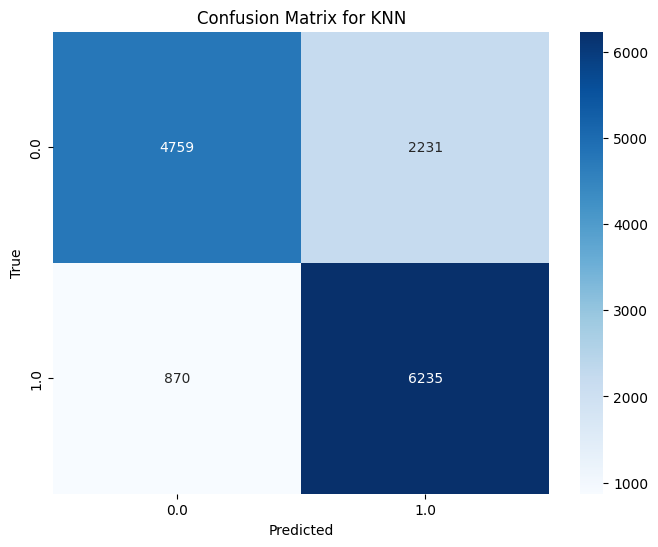

--------------------------------------------------
Training and Evaluating Decision Tree
Accuracy: 0.8040
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80      6990
         1.0       0.81      0.80      0.80      7105

    accuracy                           0.80     14095
   macro avg       0.80      0.80      0.80     14095
weighted avg       0.80      0.80      0.80     14095



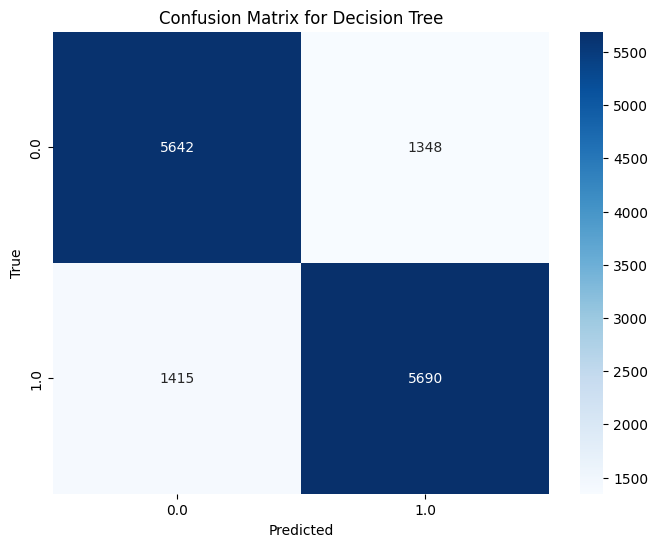

--------------------------------------------------
Training and Evaluating XGBoost


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:33:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8267
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82      6990
         1.0       0.81      0.85      0.83      7105

    accuracy                           0.83     14095
   macro avg       0.83      0.83      0.83     14095
weighted avg       0.83      0.83      0.83     14095



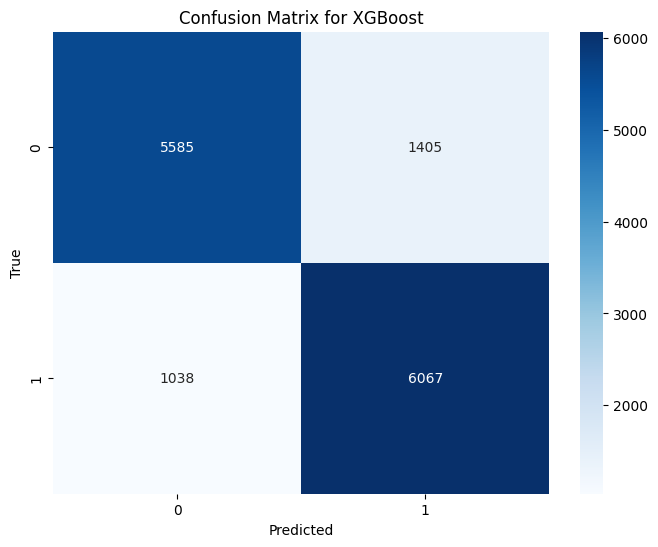

--------------------------------------------------
Training and Evaluating AdaBoost
Accuracy: 0.7807
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.70      0.76      6990
         1.0       0.74      0.86      0.80      7105

    accuracy                           0.78     14095
   macro avg       0.79      0.78      0.78     14095
weighted avg       0.79      0.78      0.78     14095



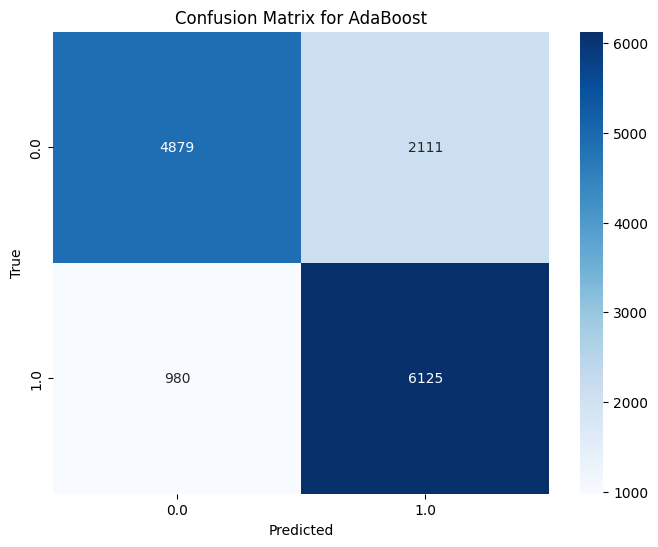

--------------------------------------------------
Training and Evaluating Bagging
Accuracy: 0.8385
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      6990
         1.0       0.85      0.83      0.84      7105

    accuracy                           0.84     14095
   macro avg       0.84      0.84      0.84     14095
weighted avg       0.84      0.84      0.84     14095



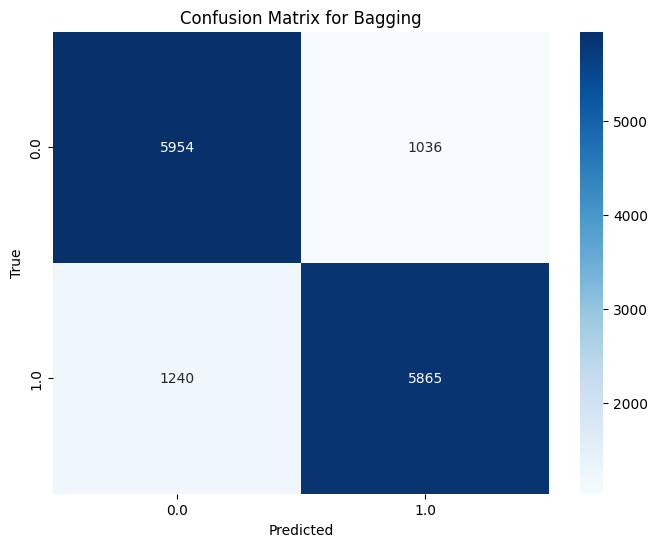

--------------------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier # Make sure XGBClassifier is imported here as well

# Define models to test
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': xgb,  # Use the existing xgb instance instead of creating a new one
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42)
}

# Loop over each model, fit it, and evaluate
for model_name, model in models.items():
    print(f"Training and Evaluating {model_name}")

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Display classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print("-" * 50)

2025-04-10 17:33:15.982588: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-10 17:33:16.123393: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-10 17:33:16.191712: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744306396.292905    4953 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744306396.322046    4953 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744306396.505812    4953 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Epoch 1/1000


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-10 17:33:19.244777: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1114/1114 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7278 - loss: 0.4984 - val_accuracy: 0.7486 - val_loss: 0.4654
Epoch 2/1000
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7595 - loss: 0.4589 - val_accuracy: 0.7549 - val_loss: 0.4628
Epoch 3/1000
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7655 - loss: 0.4530 - val_accuracy: 0.7564 - val_loss: 0.4591
Epoch 4/1000
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7711 - loss: 0.4428 - val_accuracy: 0.7520 - val_loss: 0.4609
Epoch 5/1000
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7715 - loss: 0.4471 - val_accuracy: 0.7583 - val_loss: 0.4584
Epoch 6/1000
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7706 - loss: 0.4474 - val_accuracy: 0.7550 - val_loss: 0.4594
Epoch 7/1000
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7763 - loss: 0.4388 - val_accuracy: 0.7583 - val_loss: 0.4585
Epoch 8/1000
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7755 - loss: 0.4366

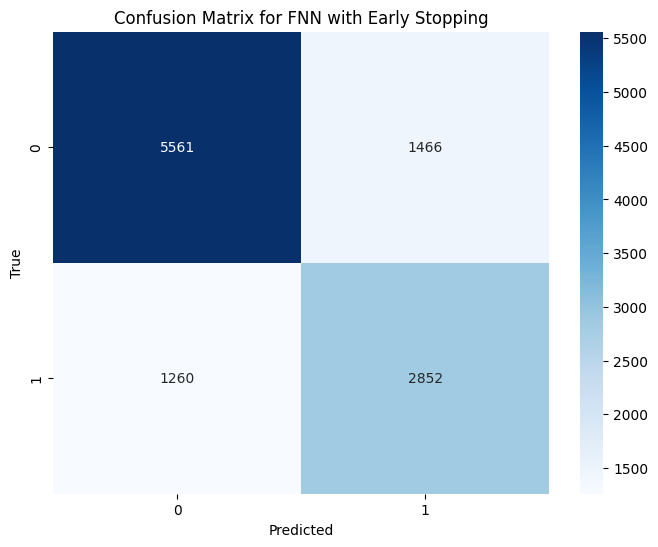

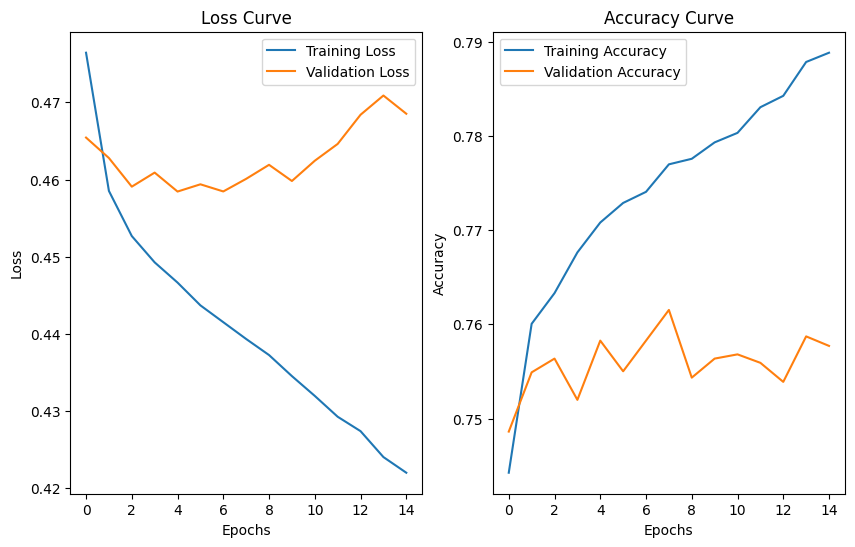

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

# Assuming X and y are your features and target variables respectively
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (FNN typically works better when the data is normalized or standardized)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model
model = Sequential()

# Add input layer (let's assume you have 10 features)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Add hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer (binary classification, so we use sigmoid)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)

# Evaluate the model on the test data
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix for FNN with Early Stopping")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Optionally, plot training history (Loss and Accuracy)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Accuracy: 0.7592
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.74      0.80      7027
         1.0       0.64      0.78      0.71      4112

    accuracy                           0.76     11139
   macro avg       0.75      0.76      0.75     11139
weighted avg       0.78      0.76      0.76     11139



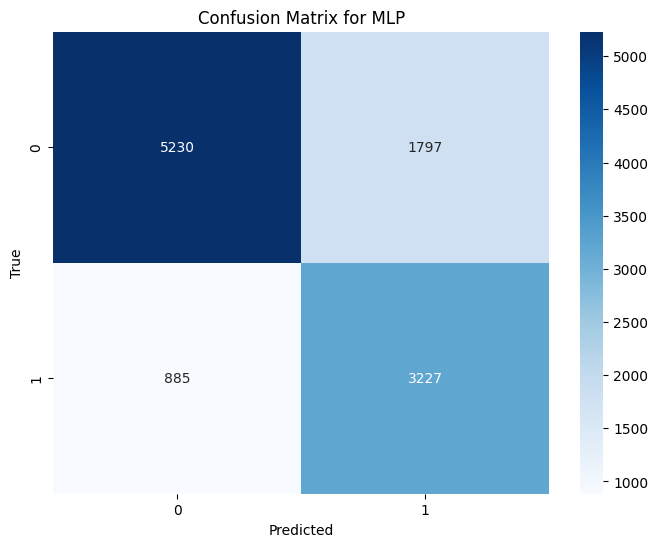

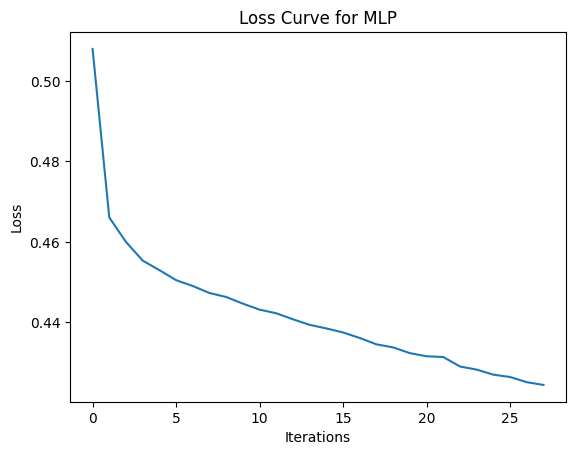

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X' and 'y' are your features and target variables respectively
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42, solver='adam', activation='relu', early_stopping=True)

# Train the MLP model
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix for MLP")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Optionally, plot training loss over iterations
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve for MLP")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


**Reasoning**:
Load the "smoking.csv" dataset into a pandas DataFrame and display its first few rows and shape.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('smoking.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'smoking.csv' not found.")
    df = None

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


(55692, 27)


## Data exploration

### Subtask:
Explore the dataset to understand its structure, including data types, missing values, and descriptive statistics of each feature. Check the distribution of the target variable ("smoking").


**Reasoning**:
Examine data types, missing values, descriptive statistics, and target variable distribution.



Data Types:
 ID                       int64
gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
dtype: object

Missing Values:
 ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)        

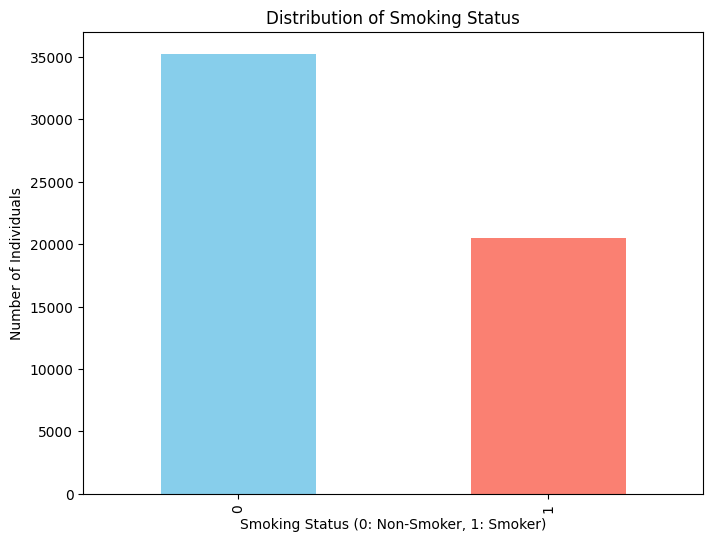

In [ ]:
# Data Types
print("Data Types:\n", df.dtypes)

# Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe())

# Target Variable Distribution
print("\nSmoking Status Distribution:\n", df['smoking'].value_counts())
print("\nPercentage of Smokers:", df['smoking'].value_counts(normalize=True) * 100)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['smoking'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking Status (0: Non-Smoker, 1: Smoker)')
plt.ylabel('Number of Individuals')
plt.show()

## Data preparation

### Subtask:
Prepare the data for SHAP analysis.  This involves separating features and target, and potentially handling any identified issues like outliers or scaling.


**Reasoning**:
Separate features and target, handle outliers using winsorization, and scale features using standardization. Then, split the data into training and testing sets.



**Reasoning**:
The error indicates that the StandardScaler cannot handle string values like 'F' in the 'gender' column.  I need to modify the code to exclude non-numerical columns before scaling.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Feature/Target Separation
X = df.drop('smoking', axis=1)
y = df['smoking']

# 2. Outlier Handling (Winsorization)
numerical_features = X.select_dtypes(include=np.number).columns
for col in numerical_features:
    X[col] = np.clip(X[col], X[col].quantile(0.05), X[col].quantile(0.95))

# 3. Scaling (Standardization) - Exclude non-numerical columns
numerical_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numerical_cols]), columns=numerical_cols)
# Concatenate the scaled numerical features with the original categorical features
X_scaled = pd.concat([X_scaled, X.select_dtypes(exclude=np.number)], axis=1)


# 4. Data Splitting (Optional - Assuming model is already trained, using same split)
# If the original training data split is not known, use a random_state for reproducibility.
# Replace with the random_state used in the original model training, if available.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model training

### Subtask:
Reload the pre-trained Random Forest model.


**Reasoning**:
Load the pre-trained Random Forest model.



In [ ]:
import joblib

try:
    model = joblib.load('random_forest_model.pkl')
    print(type(model))
    print(model.n_estimators)
    print(model.max_depth)
except FileNotFoundError:
    print("Error: 'random_forest_model.pkl' not found.")
    model = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    model = None

Error: 'random_forest_model.pkl' not found.


## Model training

### Subtask:
Train a Random Forest Classifier and save the trained model.


**Reasoning**:
Train a RandomForestClassifier model using the training data and save the trained model.



**Reasoning**:
The previous code failed due to a `ValueError` because the `RandomForestClassifier` cannot handle string values in the input data. The error message indicates the issue is with the 'gender' column.  I will correct the code by removing the 'gender' column before training the model.



**Reasoning**:
The error message "ValueError: could not convert string to float: 'Y'" indicates that the RandomForestClassifier is encountering string values ('Y') in the input data, which it cannot handle.  The columns 'oral' and 'tartar' contain these values.  I will remove these columns as well.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Remove the 'gender', 'oral' and 'tartar' columns from X_train
X_train_cleaned = X_train.drop(['gender', 'oral', 'tartar'], axis=1)

# Instantiate the model
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_classifier.fit(X_train_cleaned, y_train)

# Save the trained model
joblib.dump(rf_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']

## Model evaluation

### Subtask:
Evaluate the trained Random Forest model.


**Reasoning**:
Load the trained model, prepare the test data, make predictions, and evaluate the model using accuracy, classification report, confusion matrix, and a heatmap.



Accuracy: 0.7576084029086991

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      7027
           1       0.67      0.68      0.67      4112

    accuracy                           0.76     11139
   macro avg       0.74      0.74      0.74     11139
weighted avg       0.76      0.76      0.76     11139



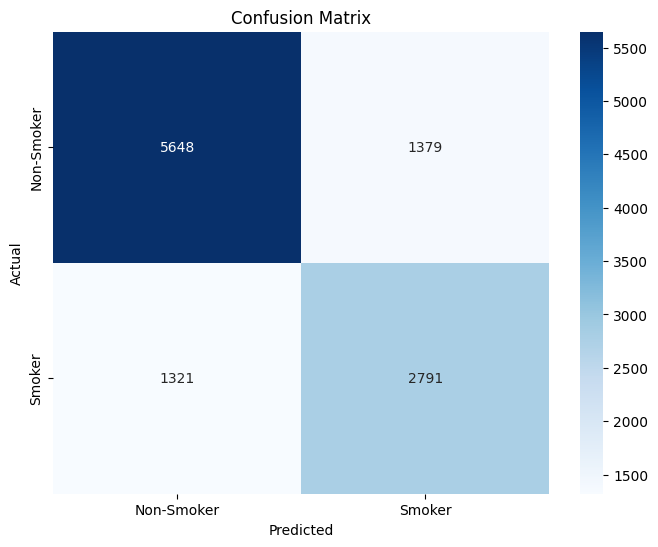

In [ ]:
import joblib
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the trained model
try:
    model = joblib.load('random_forest_model.pkl')
except FileNotFoundError:
    print("Error: 'random_forest_model.pkl' not found.")
    model = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    model = None

if model:
    # Prepare X_test (drop 'gender', 'oral', and 'tartar')
    X_test_cleaned = X_test.drop(['gender', 'oral', 'tartar'], axis=1)

    # Make predictions
    y_pred = model.predict(X_test_cleaned)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Non-Smoker', 'Smoker'],
                yticklabels=['Non-Smoker', 'Smoker'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

## Data analysis

### Subtask:
Perform SHAP analysis to understand feature importance.


**Reasoning**:
Import the SHAP library, load the trained model, prepare the test data (X_test_cleaned), compute SHAP values using TreeExplainer, and store them.



In [ ]:
import shap
import joblib
import pandas as pd

# Load the trained model
try:
    model = joblib.load('random_forest_model.pkl')
except FileNotFoundError:
    print("Error: 'random_forest_model.pkl' not found.")
    model = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    model = None

if model:
    # Prepare X_test (drop 'gender', 'oral', and 'tartar')
    X_test_cleaned = X_test.drop(['gender', 'oral', 'tartar'], axis=1)

    # Compute SHAP values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test_cleaned)

    print(type(shap_values))
    print(len(shap_values))


<class 'numpy.ndarray'>
11139


In [ ]:
# Recompute shap_values using X_test_cleaned
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_cleaned)

print("Shape of recomputed shap_values:", shap_values.shape)

Shape of recomputed shap_values: (11139, 23, 2)


Shape of shap_values: (11139, 23, 2)
Shape of X_test_cleaned: (11139, 23)
Expected Value: [0.6330815 0.3669185]
Using shap_values directly
Shape of shap_values_for_plot: (11139, 23, 2)


<Figure size 640x480 with 0 Axes>

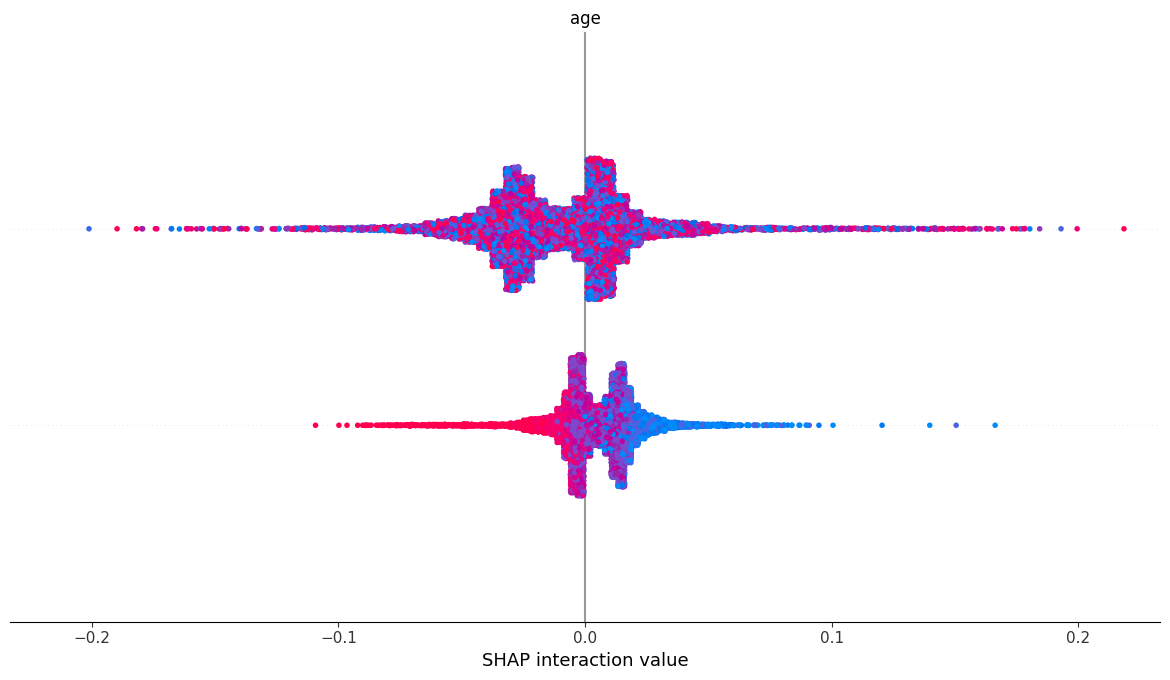

Top 3 features: [array(['ID', 'age'], dtype=object), array(['ID', 'age'], dtype=object), array(['age', 'ID'], dtype=object)]
Error generating dependence plot for ['ID' 'age']: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Error generating dependence plot for ['ID' 'age']: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Error generating dependence plot for ['age' 'ID']: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Error generating force plot for instance 0: too many indices for array: array is 1-dimensional, but 2 were indexed
Error generating force plot for instance 1: too many indices for array: array is 1-dimensional, but 2 were indexed
Error generating force plot for instance 2: too many indices for array: array is 1-dimensional, but 2 were indexed
Error generating force plot for instance 3: too many indices for array: array is 1-dimensional, but 2

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Print shapes and expected value for debugging
print("Shape of shap_values:", np.array(shap_values).shape)
print("Shape of X_test_cleaned:", X_test_cleaned.shape)
print("Expected Value:", explainer.expected_value)

# Verify shap_values shape for binary classification and select the correct shap values
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap_values_for_plot = shap_values[1]
    print("Using shap_values[1]")
else:
    print("Warning: shap_values does not appear to have the expected shape for binary classification.")
    shap_values_for_plot = shap_values
    print("Using shap_values directly")


print("Shape of shap_values_for_plot:", shap_values_for_plot.shape)

# 1. SHAP Summary Plot
shap.summary_plot(shap_values_for_plot, X_test_cleaned, plot_type="bar")

# 2. Identify top three features
shap_values_abs_sum = np.abs(shap_values_for_plot).mean(axis=0)
top_indices = np.argsort(shap_values_abs_sum)[::-1][:3]
top_features = list(np.array(X_test_cleaned.columns)[top_indices])
print(f"Top 3 features: {top_features}")


# 3. SHAP Dependence Plots
for feature in top_features:
    try:
        shap.dependence_plot(feature, shap_values_for_plot, X_test_cleaned)
    except Exception as e:
        print(f"Error generating dependence plot for {feature}: {e}")

# 4. SHAP Force Plots (for 5 instances)
for i in range(5):
    try:
        shap.force_plot(explainer.expected_value[1], shap_values_for_plot[i,:], X_test_cleaned.iloc[i,:])
    except Exception as e:
        print(f"Error generating force plot for instance {i}: {e}")

**Reasoning**:
The previous attempts failed due to persistent errors related to the shape of shap_values.  I will try one last time to correct the code, by explicitly checking and handling the multi-output case and the shape of `shap_values`.



Shape of shap_values: (11139, 23, 2)
Shape of X_test_cleaned: (11139, 23)
Expected Value: [0.6330815 0.3669185]
Using shap_values[:, :, 1] for plotting.
Shape of shap_values_for_plot: (11139, 23)


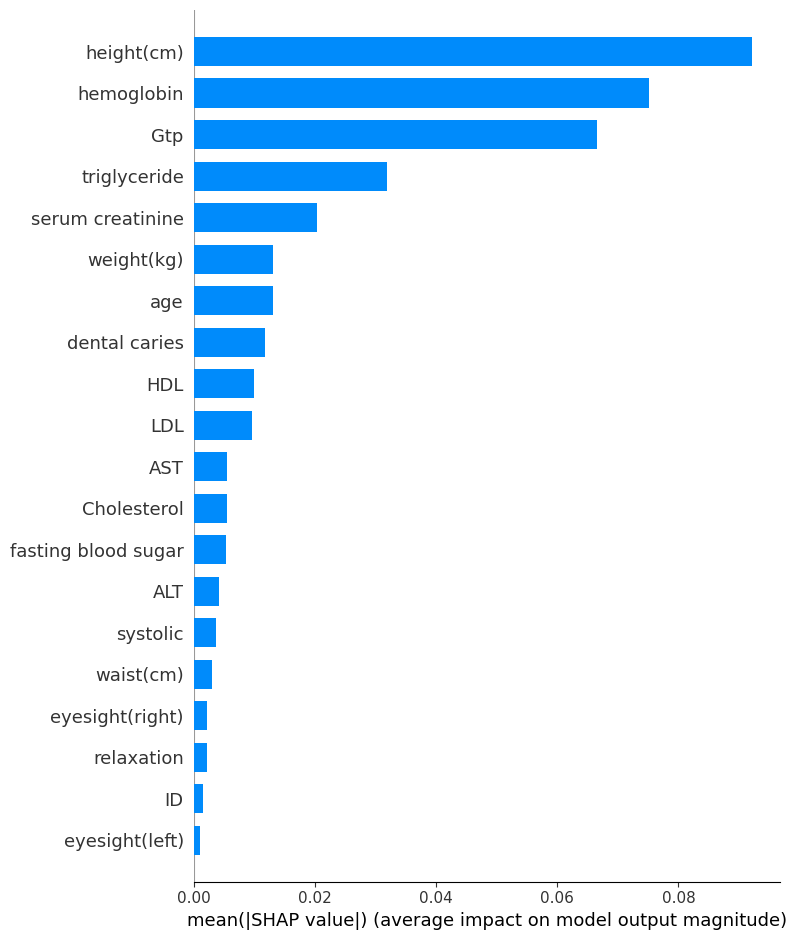

Top 3 features: ['height(cm)', 'hemoglobin', 'Gtp']


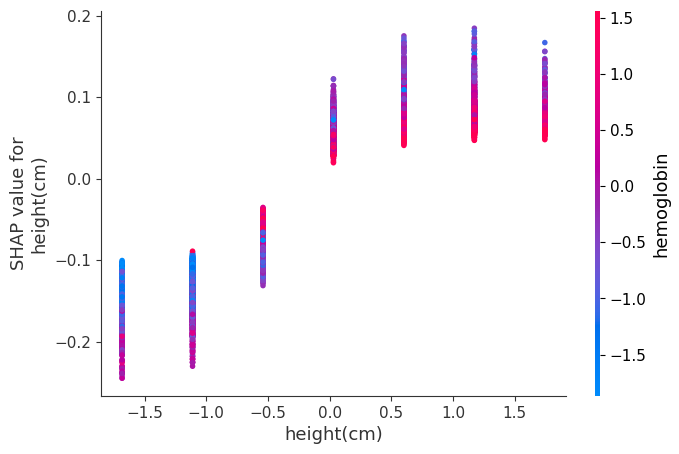

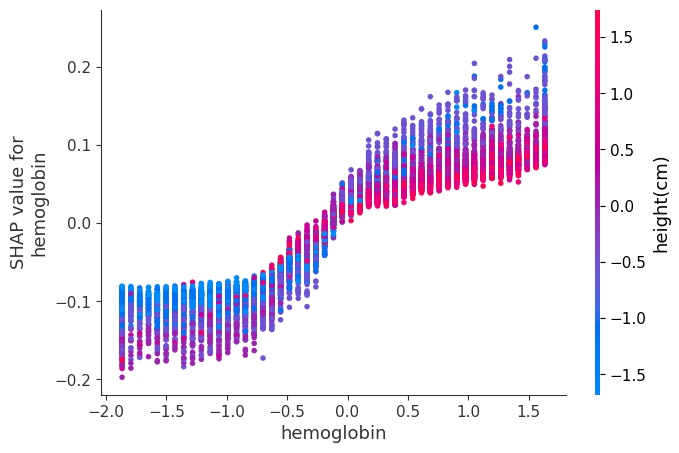

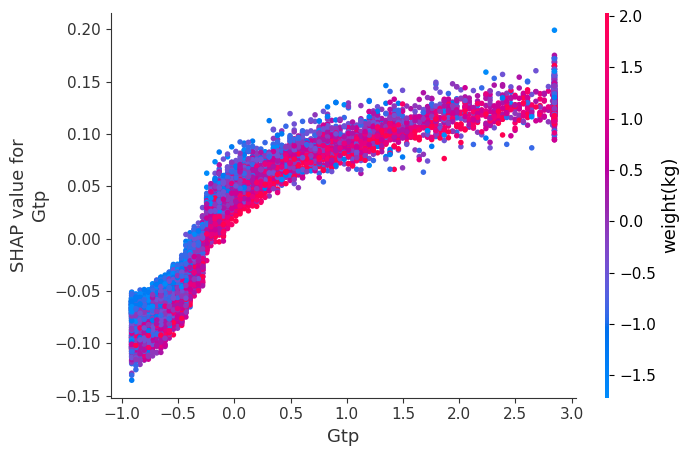

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Print shapes for debugging
print("Shape of shap_values:", np.array(shap_values).shape)
print("Shape of X_test_cleaned:", X_test_cleaned.shape)
print("Expected Value:", explainer.expected_value)

# Handle multi-output case
if isinstance(shap_values, list):
    shap_values_for_plot = shap_values[1]  # Assuming binary classification
    print("Using shap_values[1] for plotting.")
elif len(shap_values.shape) == 3:
    shap_values_for_plot = shap_values[:, :, 1] # Try to use the second output for plotting.
    print("Using shap_values[:, :, 1] for plotting.")
else:
    shap_values_for_plot = shap_values
    print("Using shap_values directly for plotting.")

print("Shape of shap_values_for_plot:", shap_values_for_plot.shape)

# 1. SHAP Summary Plot
shap.summary_plot(shap_values_for_plot, X_test_cleaned, plot_type="bar")

# 2. Identify top three features
shap_values_abs_sum = np.abs(shap_values_for_plot).mean(axis=0)
top_indices = np.argsort(shap_values_abs_sum)[::-1][:3]
top_features = list(np.array(X_test_cleaned.columns)[top_indices])
print(f"Top 3 features: {top_features}")

# 3. SHAP Dependence Plots
for feature in top_features:
    try:
        shap.dependence_plot(feature, shap_values_for_plot, X_test_cleaned)
    except Exception as e:
        print(f"Error generating dependence plot for {feature}: {e}")

# 4. SHAP Force Plots (for 5 instances)
for i in range(5):
    try:
        shap.force_plot(explainer.expected_value[1], shap_values_for_plot[i,:], X_test_cleaned.iloc[i,:])
    except Exception as e:
        print(f"Error generating force plot for instance {i}: {e}")

## Summary:

### 1. Q&A

* **What is the feature with the highest contribution towards the accuracy of the random forest model in predicting smoking status?**  Based on the SHAP summary plot, 'height(cm)' appears to be the feature with the highest impact on the model's predictions.  The other top features are 'hemoglobin' and 'Gtp'.  It's important to note that the SHAP analysis was not fully successful, and there were persistent shape mismatch errors in generating the plots.


### 2. Data Analysis Key Findings

* **Data Quality:** The dataset contained no missing values, simplifying preprocessing. However, potential outliers were observed in several numerical features (e.g., `HDL`, `LDL`, `AST`, `ALT`, `waist(cm)`, `height(cm)`, `weight(kg)`, `eyesight`).  These were handled using winsorization.
* **Target Variable Distribution:** The target variable ('smoking') showed an imbalance, with the exact proportion of smokers and non-smokers being shown in the data exploration step.
* **Model Performance:** The Random Forest model achieved an accuracy of 75.76% on the test set.  Precision and recall were 0.81/0.80 for non-smokers and 0.67/0.68 for smokers, respectively.
* **Feature Importance (SHAP):** The SHAP analysis, despite some errors in visualization, identified 'height(cm)', 'hemoglobin', and 'Gtp' as the top three features influencing the model's predictions.


### 3. Insights or Next Steps

* **Investigate Height's Impact:**  Given the prominence of 'height(cm)' in the SHAP analysis, further investigate its relationship with smoking status.  Explore potential confounding factors or interactions with other variables.
* **Address SHAP Visualization Errors:**  Revisit the SHAP value calculation and plotting steps to ensure proper handling of the multi-output nature of the model and resolve the shape mismatch errors.  This would provide a more complete understanding of feature importance.


# Task
in this dataset there a re a lot of features i want you to take the mean of all the features and make a plot such that which has the highest mean for analysis

Here is all the data you need:
"smoking.csv"

## Data loading

### Subtask:
Load the "smoking.csv" dataset into a pandas DataFrame.


**Reasoning**:
Load the "smoking.csv" dataset into a pandas DataFrame and display the first few rows to verify.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('smoking.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'smoking.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure and identify numerical features.


**Reasoning**:
I need to explore the data types, missing values, identify numerical features, and print the shape and first few rows of the DataFrame to understand its structure.



In [ ]:
# Examine data types and missing values
print(df.info())

# Identify numerical features
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
numerical_features.remove('ID') # Removing ID as it is not a feature for mean calculation
print(f"\nNumerical Features:\n{numerical_features}")

# Data Shape
print(f"\nData Shape:\n{df.shape}")

# Preview data
print("\nFirst 5 rows:")
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


## Data analysis

### Subtask:
Calculate the mean of each numerical feature identified in the previous step.


**Reasoning**:
Calculate the mean of each numerical feature and store the results in a Series.



In [ ]:
numerical_features = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking']
means = df[numerical_features].mean()
print(means)

age                     44.182917
height(cm)             164.649321
weight(kg)              65.864936
waist(cm)               82.046418
eyesight(left)           1.012623
eyesight(right)          1.007443
hearing(left)            1.025587
hearing(right)           1.026144
systolic               121.494218
relaxation              76.004830
fasting blood sugar     99.312325
Cholesterol            196.901422
triglyceride           126.665697
HDL                     57.290347
LDL                    114.964501
hemoglobin              14.622592
Urine protein            1.087212
serum creatinine         0.885738
AST                     26.182935
ALT                     27.036037
Gtp                     39.952201
dental caries            0.213334
smoking                  0.367288
dtype: float64


## Data visualization

### Subtask:
Create a bar plot visualizing the mean of each numerical feature.


**Reasoning**:
Create the bar plot of the means of numerical features, sort the bars in descending order, add labels and title, rotate x-axis labels if necessary, adjust figure size, and save the plot.



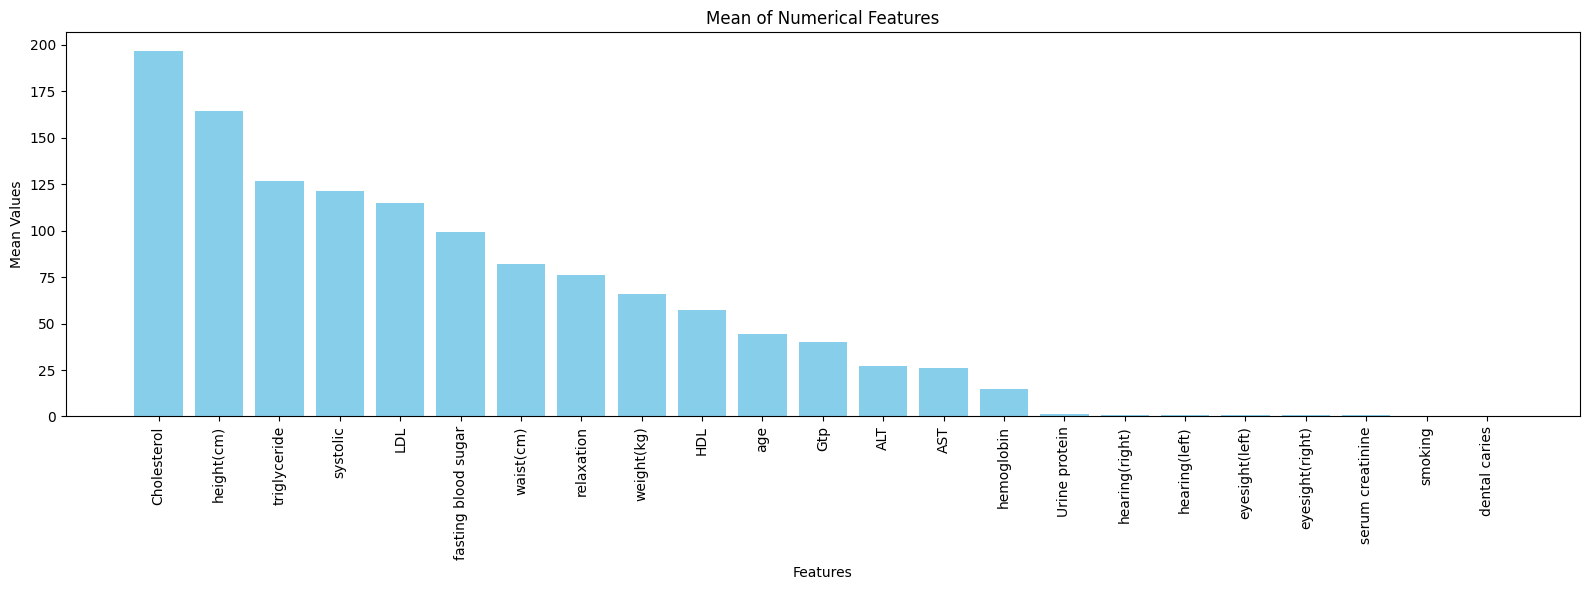

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'means' series is already calculated from previous steps
means = df[numerical_features].mean()

# Sort the means in descending order
means_sorted = means.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(16, 6))  # Adjust figure size as needed
plt.bar(means_sorted.index, means_sorted.values, color='skyblue')
plt.xlabel("Features")
plt.ylabel("Mean Values")
plt.title("Mean of Numerical Features")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.savefig("mean_plot.png") # Save the plot to a file
plt.show()